In [33]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("profiles.csv", encoding = 'utf-8')
#print(df.columns)
#print(len(df))
#print(df["body_type"].value_counts())
df.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [35]:
df['signsCleaned'] = df.sign.str.split().str.get(0)
print("number of categories:",df.signsCleaned.nunique())
print("categories:", df.signsCleaned.unique())

df.signsCleaned.value_counts()

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

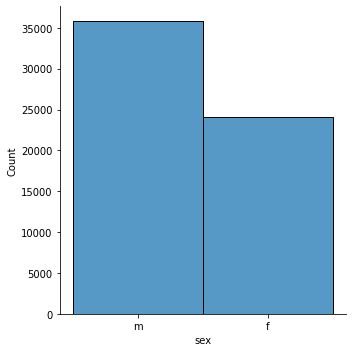

In [39]:
sns.displot(data=df, x="sex", kind="hist", binwidth = 5);

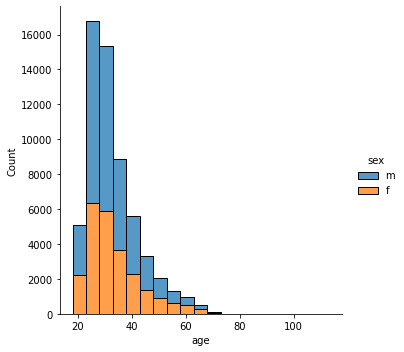

In [41]:
sns.displot(data=df, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

In [43]:
df.isnull().sum()

age                 0
body_type        5296
diet            24395
drinks           2985
drugs           14080
education        6628
essay0           5488
essay1           7572
essay2           9638
essay3          11476
essay4          10537
essay5          10850
essay6          13771
essay7          12451
essay8          19225
essay9          12603
ethnicity        5680
height              3
income              0
job              8198
last_online         0
location            0
offspring       35561
orientation         0
pets            19921
religion        20226
sex                 0
sign            11056
smokes           5512
speaks             50
status              0
signsCleaned    11056
dtype: int64

In [45]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion',
       'sex', 'job', 'signsCleaned']
df = df[cols].dropna()
df.shape

(16453, 8)

In [46]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [47]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [49]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.12      0.08      0.10       968
       aries       0.13      0.09      0.11       983
      cancer       0.13      0.21      0.16      1129
   capricorn       0.14      0.06      0.08       882
      gemini       0.13      0.18      0.15      1130
         leo       0.13      0.20      0.16      1121
       libra       0.13      0.11      0.12      1028
      pisces       0.14      0.12      0.13       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.06      0.09      1001
      taurus       0.12      0.12      0.12      1045
       virgo       0.12      0.18      0.15      1090

    accuracy                           0.13     12339
   macro avg       0.13      0.13      0.12     12339
weighted avg       0.13      0.13      0.12     12339



In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [52]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.27      0.66      0.38       968
       aries       0.26      0.54      0.35       983
      cancer       0.31      0.46      0.37      1129
   capricorn       0.35      0.37      0.36       882
      gemini       0.38      0.34      0.36      1130
         leo       0.38      0.28      0.33      1121
       libra       0.41      0.26      0.32      1028
      pisces       0.44      0.28      0.34       997
 sagittarius       0.40      0.21      0.27       965
     scorpio       0.41      0.22      0.28      1001
      taurus       0.41      0.23      0.29      1045
       virgo       0.44      0.26      0.33      1090

    accuracy                           0.34     12339
   macro avg       0.37      0.34      0.33     12339
weighted avg       0.37      0.34      0.33     12339



In [53]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.83      0.98      0.90       968
       aries       0.81      0.96      0.88       983
      cancer       0.86      0.94      0.90      1129
   capricorn       0.88      0.94      0.91       882
      gemini       0.87      0.92      0.89      1130
         leo       0.91      0.90      0.90      1121
       libra       0.91      0.90      0.90      1028
      pisces       0.92      0.86      0.89       997
 sagittarius       0.95      0.86      0.90       965
     scorpio       0.96      0.86      0.90      1001
      taurus       0.96      0.86      0.91      1045
       virgo       0.99      0.82      0.90      1090

    accuracy                           0.90     12339
   macro avg       0.90      0.90      0.90     12339
weighted avg       0.90      0.90      0.90     12339



In [54]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

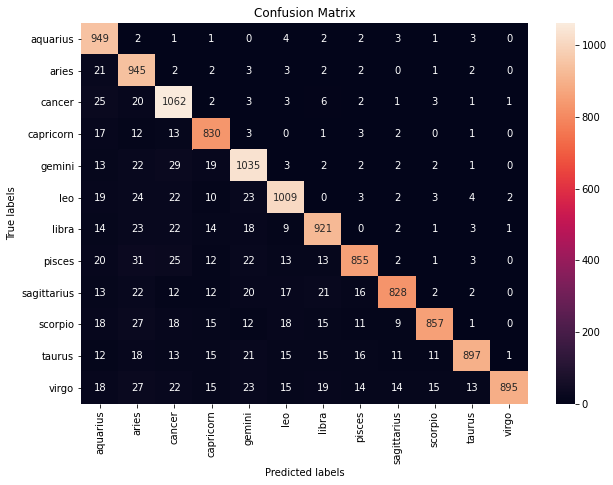

In [55]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [56]:
cart_model.get_depth()

75

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08752026 0.09562399 0.08954619 0.0863047  0.07904337]
Baseline: 8.76% (0.53%)


In [58]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.51      0.29      0.37       968
       aries       0.54      0.28      0.37       983
      cancer       0.23      0.45      0.31      1129
   capricorn       0.74      0.24      0.37       882
      gemini       0.19      0.53      0.28      1130
         leo       0.51      0.34      0.41      1121
       libra       0.31      0.34      0.32      1028
      pisces       0.52      0.26      0.35       997
 sagittarius       0.31      0.30      0.31       965
     scorpio       0.87      0.20      0.33      1001
      taurus       0.43      0.28      0.34      1045
       virgo       0.28      0.36      0.32      1090

    accuracy                           0.33     12339
   macro avg       0.45      0.32      0.34     12339
weighted avg       0.45      0.33      0.34     12339



In [59]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.0923825  0.09359806 0.08954619 0.07941653 0.08309688]
Baseline: 8.76% (0.53%)


In [60]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.20      0.11       294
       aries       0.08      0.14      0.10       345
      cancer       0.08      0.15      0.11       328
   capricorn       0.08      0.07      0.07       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.05      0.06       395
       libra       0.06      0.05      0.05       326
      pisces       0.08      0.05      0.06       337
 sagittarius       0.08      0.04      0.05       347
     scorpio       0.09      0.05      0.07       355
      taurus       0.08      0.04      0.05       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.08      4114
   macro avg       0.08      0.08      0.07      4114
weighted avg       0.08      0.08      0.07      4114



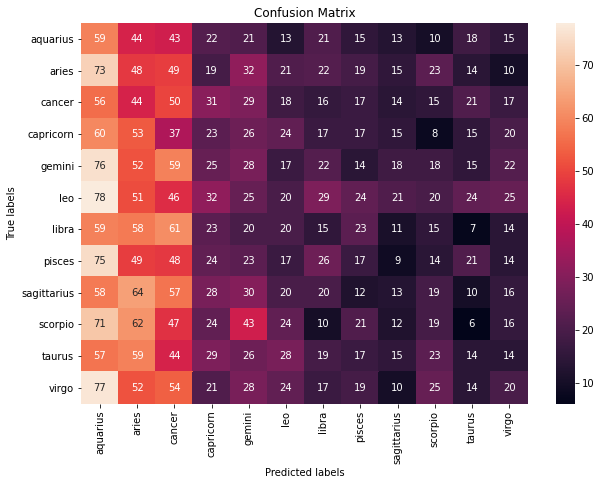

In [61]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);